# Օդի որակի և աղտոտվածության գնահատում

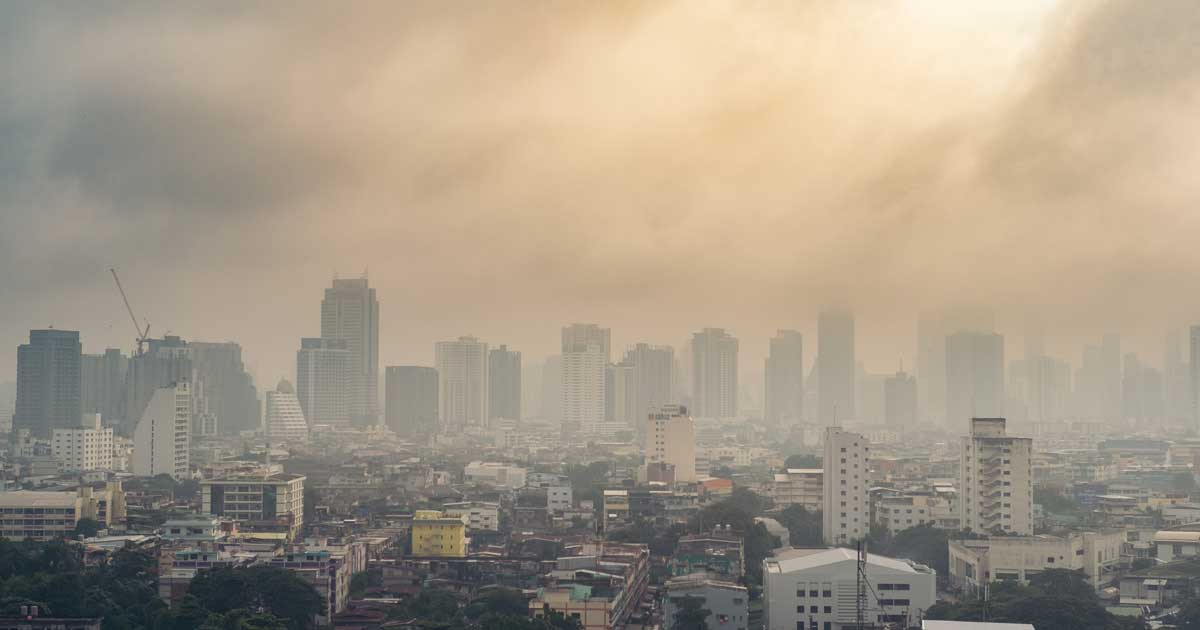

## Ներմուծենք անհրաժեշտ գրադարանները և բեռնենք տվյալները



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving updated_pollution_dataset.csv to updated_pollution_dataset.csv


In [ ]:
df = pd.read_csv(open('updated_pollution_dataset.csv','rb'))
df.head()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


## Data Visualization and Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


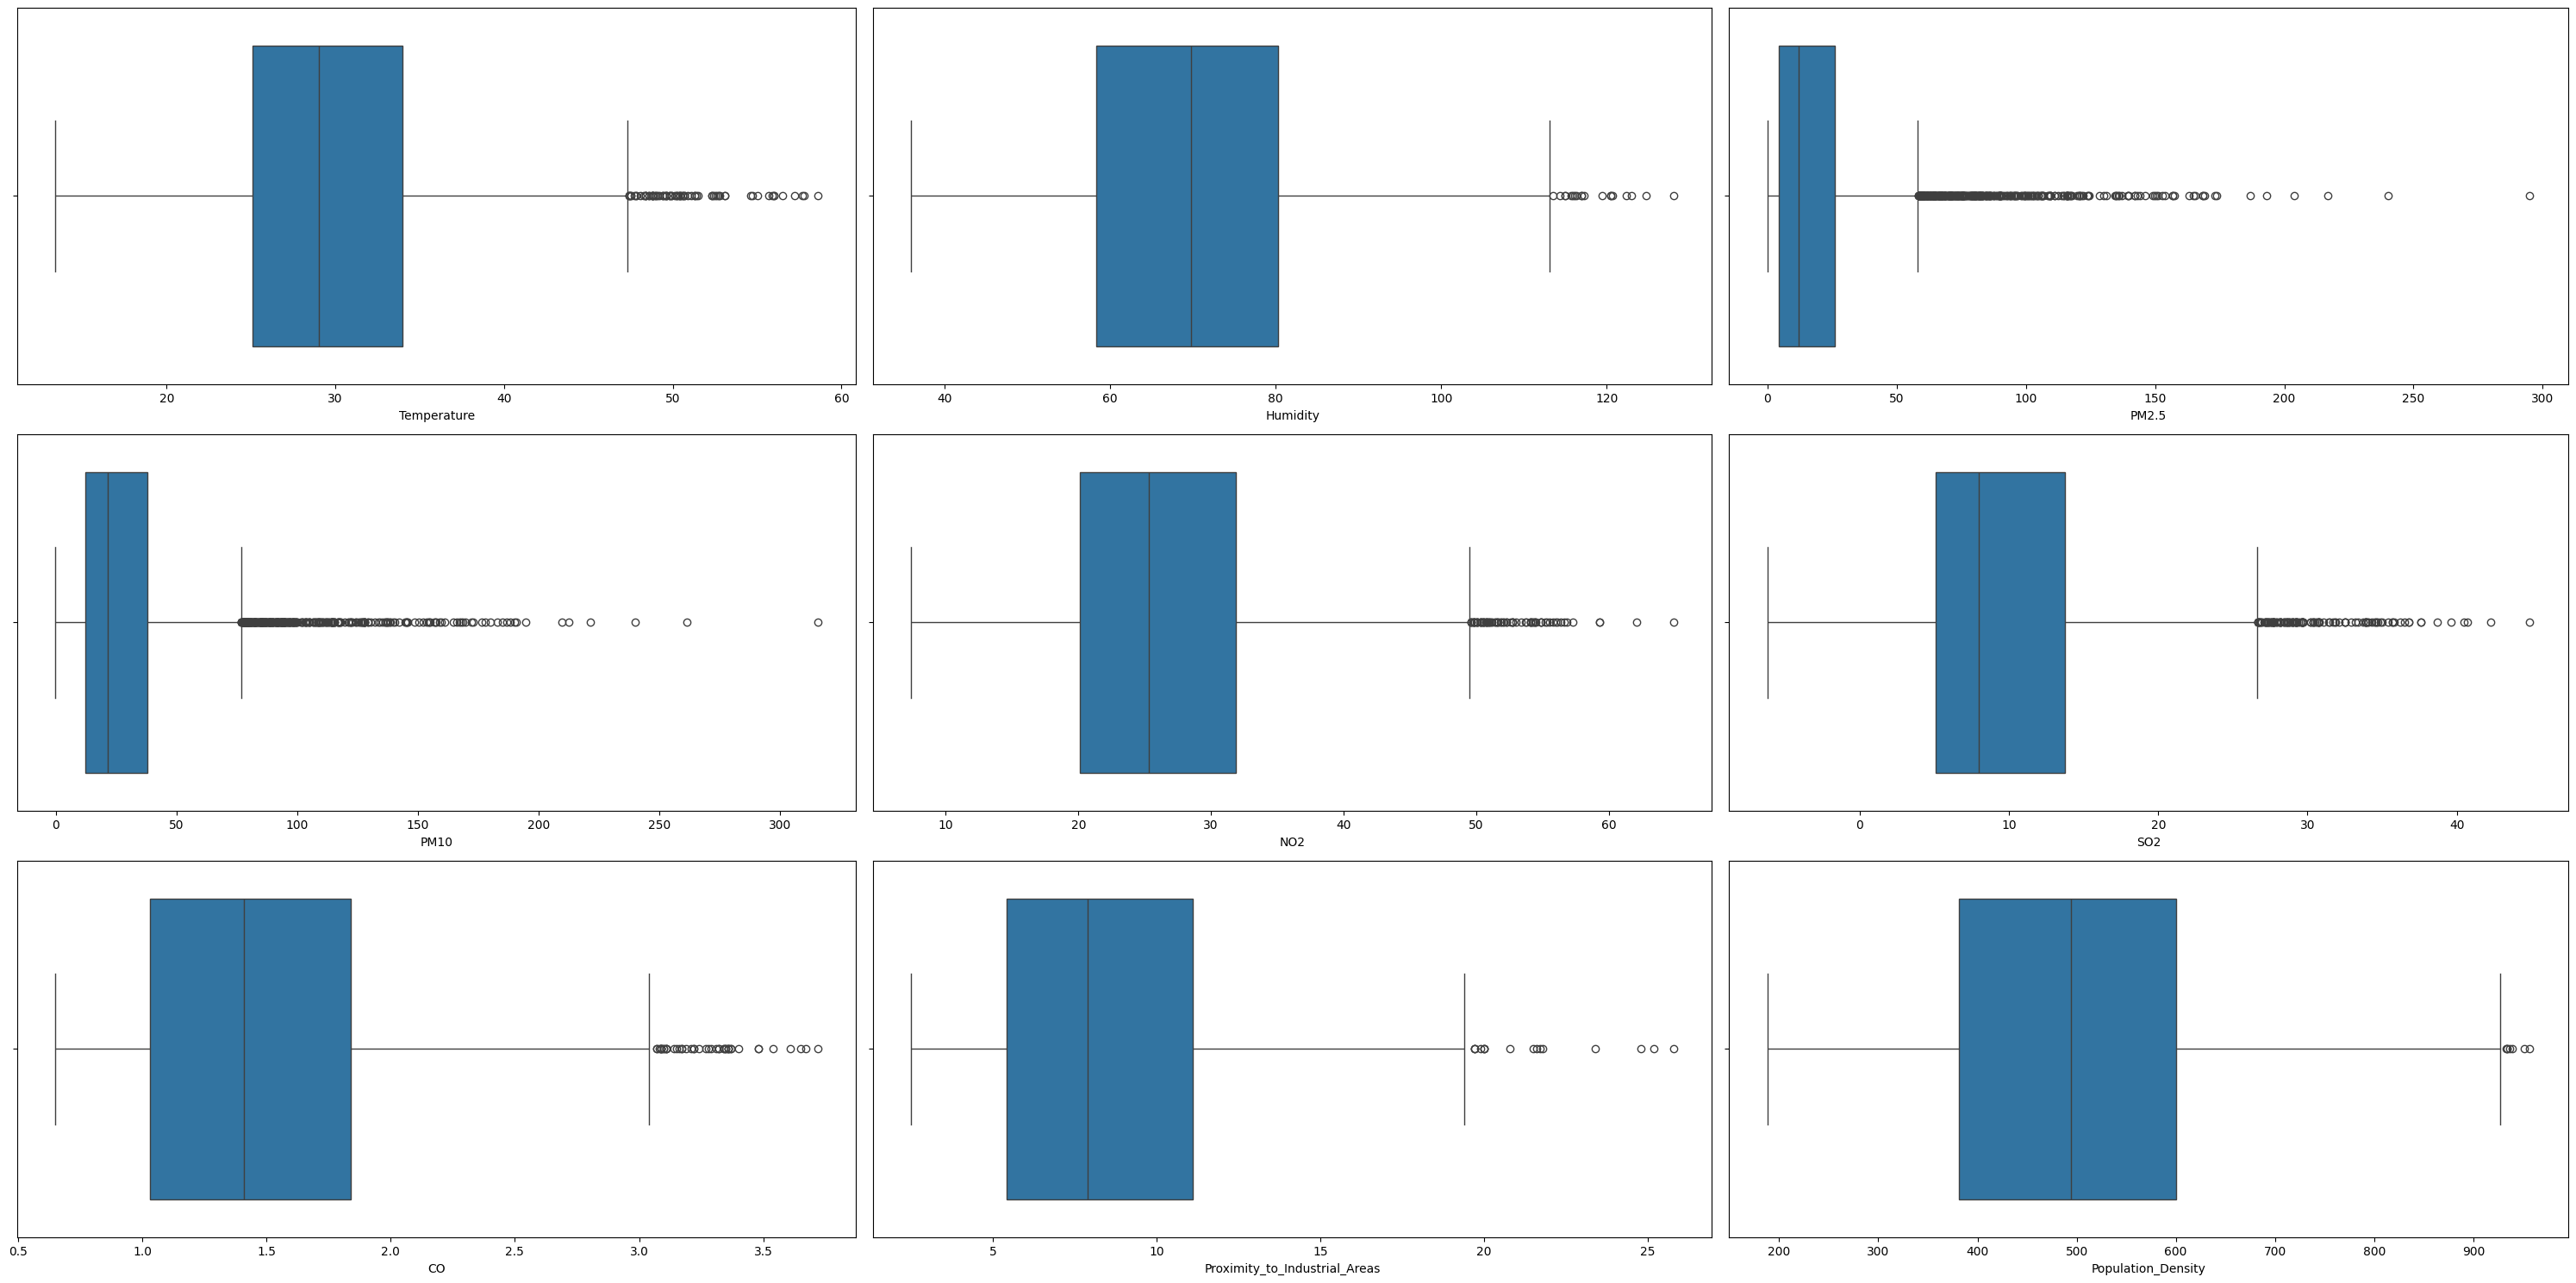

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(30,15))
ax=ax.flatten()
i=0

for col in df.columns:
    if col!='Air Quality' and i<9:
        sns.boxplot(data=df,x=col,ax=ax[i])
        i+=1

plt.tight_layout()
plt.show()

## Data Preprocessing and Feature Selection

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


## Բաժանենք տվյալները

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Air Quality'] = encoder.fit_transform(df['Air Quality'])

x = df.drop(columns='Air Quality')
y = df['Air Quality']
x_t, x_te, y_t, y_te = train_test_split(x, y, test_size=0.25, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_t, y_t, test_size=0.2, random_state=20)
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_te.shape, y_te.shape)

Training set: (3000, 9) (3000,)
Validation set: (750, 9) (750,)
Test set: (1250, 9) (1250,)


##  Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error


model = LogisticRegression(random_state=20,solver='liblinear', class_weight='balanced')


model.fit(x_train, y_train)


y_val_pred = model.predict(x_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", mse_val)


print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


y_test_pred = model.predict(x_te)
mse_test = mean_squared_error(y_te, y_test_pred)
print("Test MSE:", mse_test)


print("Test Accuracy:", accuracy_score(y_te, y_test_pred))
print("Test Classification Report:\n", classification_report(y_te, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_te, y_test_pred))


Validation MSE: 0.25333333333333335
Validation Accuracy: 0.896
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       290
           1       0.85      0.86      0.86        74
           2       0.88      0.88      0.88       225
           3       0.82      0.75      0.78       161

    accuracy                           0.90       750
   macro avg       0.88      0.87      0.87       750
weighted avg       0.89      0.90      0.89       750

Validation Confusion Matrix:
 [[290   0   0   0]
 [  0  64   0  10]
 [ 11   0 198  16]
 [  2  11  28 120]]
Test MSE: 0.248
Test Accuracy: 0.896
Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       503
           1       0.79      0.83      0.81       115
           2       0.89      0.89      0.89       389
           3       0.80      0.72      0.76       243

    accuracy          

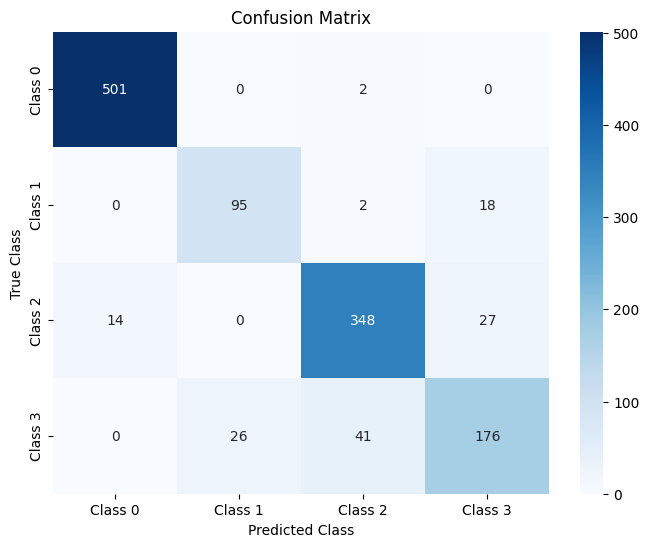

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


conf_matrix_1 = np.array([[501, 0, 2, 0],
                        [0, 95, 2, 18],
                        [14, 0, 348, 27],
                        [0, 26, 41, 176]])


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


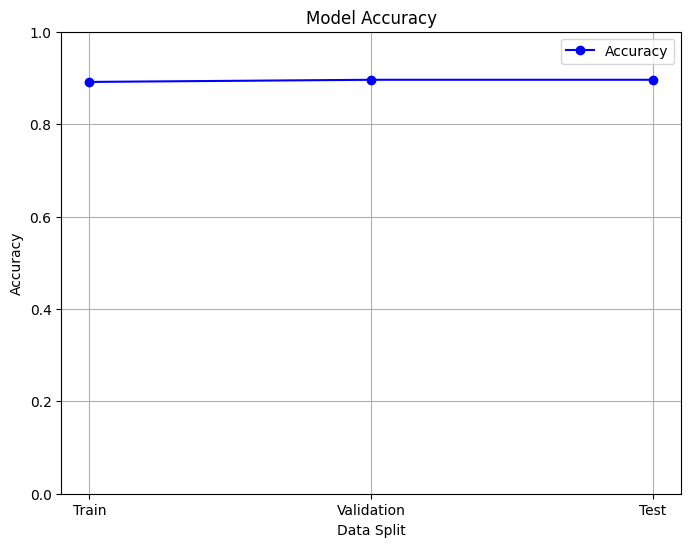

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_te)


train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_te, y_test_pred)


accuracies = [train_accuracy, val_accuracy, test_accuracy]
labels = ['Train', 'Validation', 'Test']


plt.figure(figsize=(8, 6))
plt.plot(labels, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')


plt.title('Model Accuracy')
plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)


plt.legend()
plt.show()


## KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error


knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(x_train, y_train)


y_val_pred_knn = knn_model.predict(x_val)
mse_val = mean_squared_error(y_val, y_val_pred_knn)
print("Validation MSE:", mse_val)


print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_knn))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_knn))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_knn))


y_test_pred_knn = knn_model.predict(x_te)
mse_test = mean_squared_error(y_te, y_test_pred_knn)
print("Test MSE:", mse_test)


print("Test Accuracy:", accuracy_score(y_te, y_test_pred_knn))
print("Test Classification Report:\n", classification_report(y_te, y_test_pred_knn))
print("Test Confusion Matrix:\n", confusion_matrix(y_te, y_test_pred_knn))

Validation MSE: 0.584
Validation Accuracy: 0.7853333333333333
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.93       290
           1       0.70      0.47      0.56        74
           2       0.73      0.81      0.77       225
           3       0.65      0.57      0.60       161

    accuracy                           0.79       750
   macro avg       0.75      0.70      0.72       750
weighted avg       0.78      0.79      0.78       750

Validation Confusion Matrix:
 [[280   0  10   0]
 [  0  35   4  35]
 [ 27   0 183  15]
 [  2  15  53  91]]
Test MSE: 0.56
Test Accuracy: 0.7944
Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       503
           1       0.71      0.50      0.59       115
           2       0.76      0.78      0.77       389
           3       0.65      0.60      0.62       243

    accuracy           

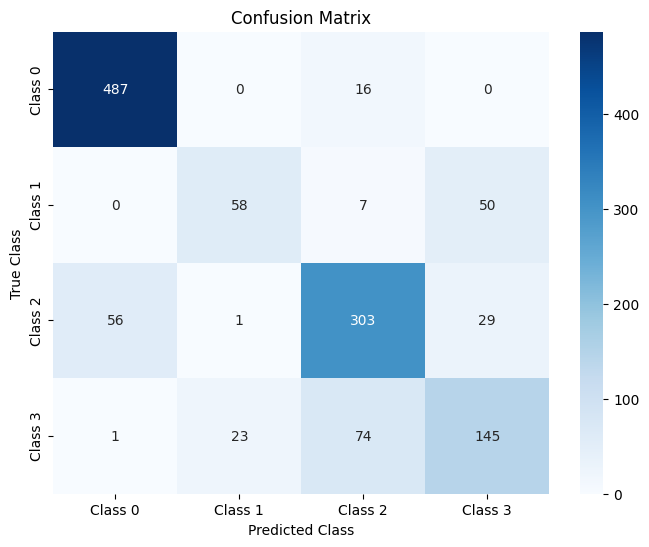

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix_2 = np.array([[487,   0,  16,   0],
 [  0,  58,   7,  50],
 [ 56,   1, 303,  29],
 [  1,  23,  74, 145]])


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


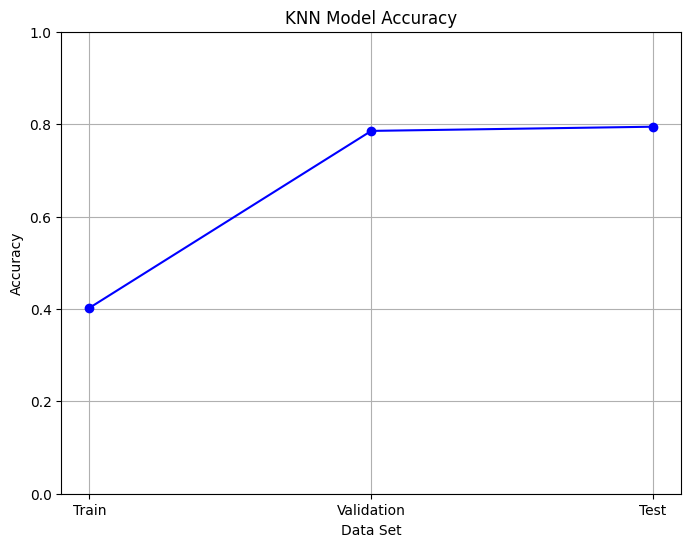

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_val_scaled = scaler.transform(x_val)



train_accuracy = accuracy_score(y_train, knn_model.predict(x_train_scaled))
val_accuracy = accuracy_score(y_val, y_val_pred_knn)
test_accuracy = accuracy_score(y_te, y_test_pred_knn)


accuracies = [train_accuracy, val_accuracy, test_accuracy]
labels = ['Train', 'Validation', 'Test']


plt.figure(figsize=(8, 6))
plt.plot(labels, accuracies, marker='o', linestyle='-', color='b', label="Accuracy")


plt.title("KNN Model Accuracy")
plt.xlabel("Data Set")
plt.ylabel("Accuracy")
plt.ylim(0, 1)


plt.grid(True)
plt.show()


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error


dt_model = DecisionTreeClassifier(random_state=20,max_depth = 5,class_weight='balanced')


dt_model.fit(x_train, y_train)


y_val_pred_dt = dt_model.predict(x_val)
mse_val = mean_squared_error(y_val, y_val_pred_dt)
print("Validation MSE:", mse_val)


print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_dt))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_dt))


y_test_pred_dt = dt_model.predict(x_te)
mse_test = mean_squared_error(y_te, y_test_pred_dt)
print("Test MSE:", mse_test)


print("Test Accuracy:", accuracy_score(y_te, y_test_pred_dt))
print("Test Classification Report:\n", classification_report(y_te, y_test_pred_dt))
print("Test Confusion Matrix:\n", confusion_matrix(y_te, y_test_pred_dt))


Validation MSE: 0.264
Validation Accuracy: 0.908
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       290
           1       0.80      0.72      0.76        74
           2       0.91      0.93      0.92       225
           3       0.79      0.86      0.83       161

    accuracy                           0.91       750
   macro avg       0.88      0.87      0.87       750
weighted avg       0.91      0.91      0.91       750

Validation Confusion Matrix:
 [[280   0  10   0]
 [  0  53   1  20]
 [  0   0 209  16]
 [  0  13   9 139]]
Test MSE: 0.2688
Test Accuracy: 0.9016
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       503
           1       0.77      0.71      0.74       115
           2       0.91      0.91      0.91       389
           3       0.76      0.82      0.79       243

    accuracy                      

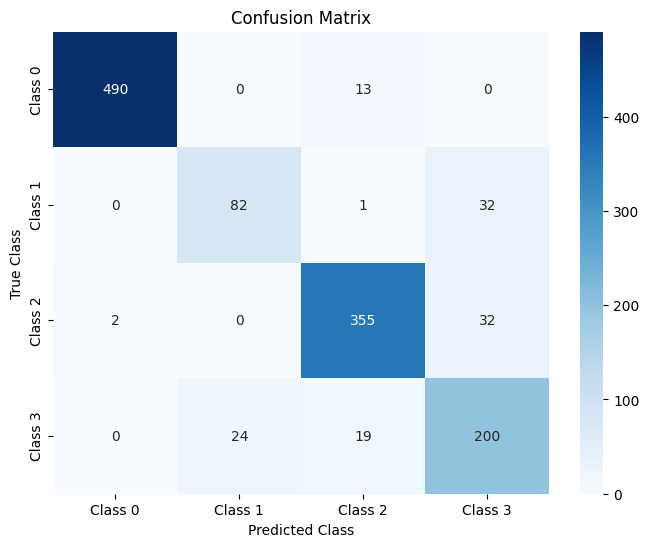

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix_3 = np.array([[490,   0,  13,   0],
 [  0,  82,   1,  32],
 [  2,   0, 355,  32],
 [  0,  24,  19, 200]])


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


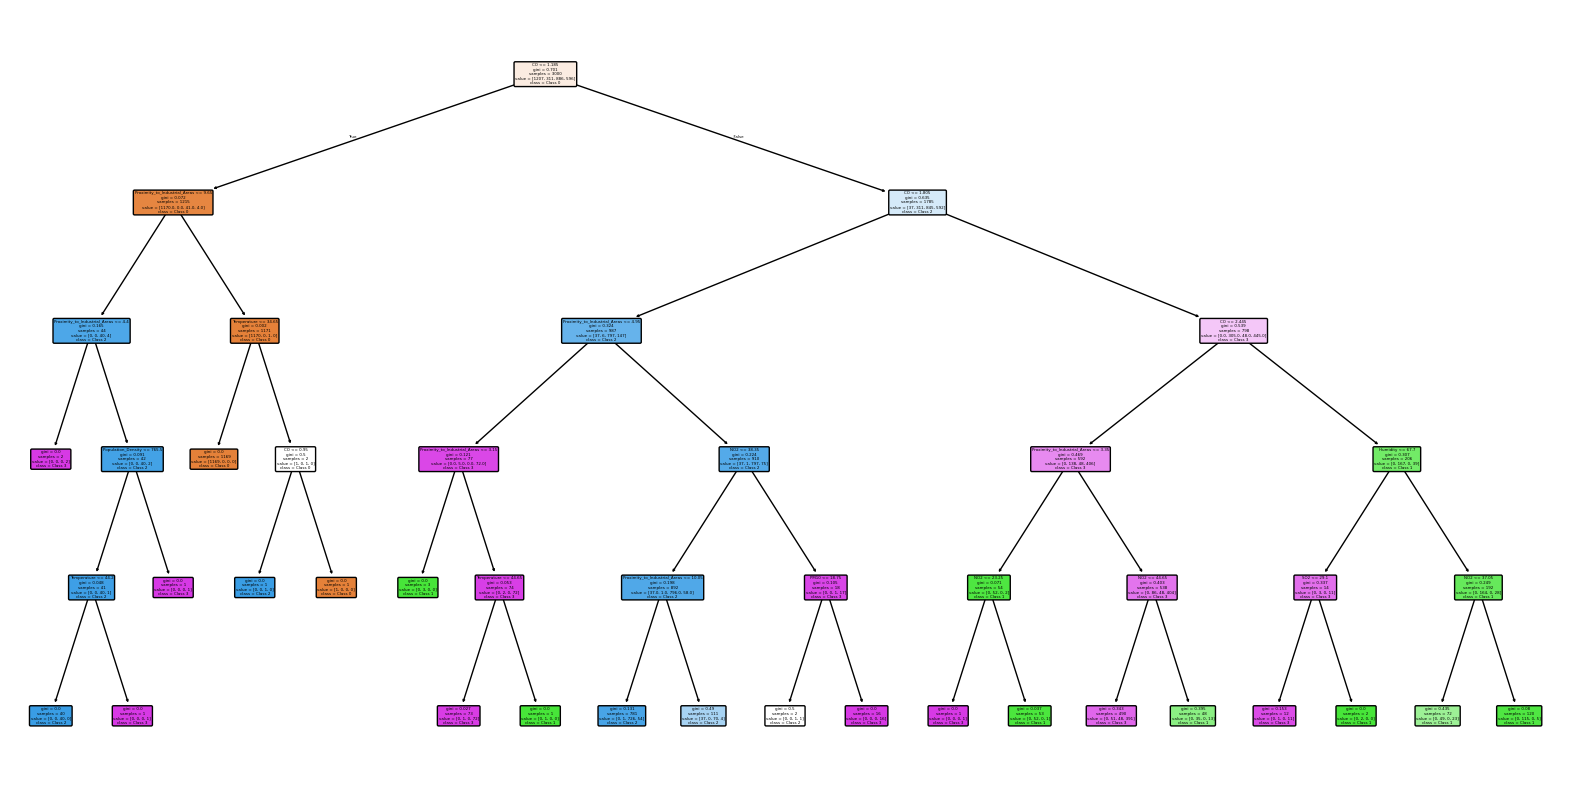

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

class_labels = np.unique(y_train)
class_names = [f'Class {label}' for label in class_labels]
dt_model = DecisionTreeClassifier(random_state=20,max_depth = 5)


dt_model.fit(x_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=x_train.columns, class_names=class_names, rounded=True)


plt.show()


## Test VS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


logreg_model = LogisticRegression(random_state=20)
knn_model = KNeighborsClassifier(n_neighbors=5)
dt_model = DecisionTreeClassifier(random_state=20)


logreg_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)


y_val_pred_logreg = logreg_model.predict(x_val)
y_val_pred_knn = knn_model.predict(x_val)
y_val_pred_dt = dt_model.predict(x_val)


y_test_pred_logreg = logreg_model.predict(x_te)
y_test_pred_knn = knn_model.predict(x_te)
y_test_pred_dt = dt_model.predict(x_te)


print("Logistic Regression Validation Report:\n", classification_report(y_val, y_val_pred_logreg))
print("KNN Validation Report:\n", classification_report(y_val, y_val_pred_knn))
print("Decision Tree Validation Report:\n", classification_report(y_val, y_val_pred_dt))


print("Logistic Regression Test Report:\n", classification_report(y_te, y_test_pred_logreg))
print("KNN Test Report:\n", classification_report(y_te, y_test_pred_knn))
print("Decision Tree Test Report:\n", classification_report(y_te, y_test_pred_dt))


train_accuracy_logreg = accuracy_score(y_train, logreg_model.predict(x_train))
train_accuracy_knn = accuracy_score(y_train, knn_model.predict(x_train))
train_accuracy_dt = accuracy_score(y_train, dt_model.predict(x_train))

val_accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)

test_accuracy_logreg = accuracy_score(y_te, y_test_pred_logreg)
test_accuracy_knn = accuracy_score(y_te, y_test_pred_knn)
test_accuracy_dt = accuracy_score(y_te, y_test_pred_dt)


print("\nTraining Accuracy Comparison:")
print(f"Logistic Regression: {train_accuracy_logreg}")
print(f"KNN: {train_accuracy_knn}")
print(f"Decision Tree: {train_accuracy_dt}")

print("\nValidation Accuracy Comparison:")
print(f"Logistic Regression: {val_accuracy_logreg}")
print(f"KNN: {val_accuracy_knn}")
print(f"Decision Tree: {val_accuracy_dt}")

print("\nTest Accuracy Comparison:")
print(f"Logistic Regression: {test_accuracy_logreg}")
print(f"KNN: {test_accuracy_knn}")
print(f"Decision Tree: {test_accuracy_dt}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Validation Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       290
           1       0.40      0.31      0.35        74
           2       0.74      0.78      0.76       225
           3       0.51      0.51      0.51       161

    accuracy                           0.75       750
   macro avg       0.65      0.64      0.65       750
weighted avg       0.74      0.75      0.75       750

KNN Validation Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.93       290
           1       0.70      0.47      0.56        74
           2       0.73      0.81      0.77       225
           3       0.65      0.57      0.60       161

    accuracy                           0.79       750
   macro avg       0.75      0.70      0.72       750
weighted avg       0.78      0.79      0.78       750

Decision Tree Validation Report:
               precision    recal

## Hyperparameter tuning GridSearchCV օգտագործելով

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(x_train, y_train)


print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 10, 'min_samples_split': 2}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}


dt_model = DecisionTreeClassifier(random_state=20)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(x_train, y_train)


print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
log_reg_f1 = f1_score(y_te, y_test_pred_logreg, average='weighted')
knn_f1 = f1_score(y_te, y_test_pred_knn, average='weighted')
dt_f1 = f1_score(y_te, y_test_pred_dt, average='weighted')

print(f"Logistic Regression F1-Score: {log_reg_f1}")
print(f"KNN F1-Score: {knn_f1}")
print(f"Decision Tree F1-Score: {dt_f1}")

Logistic Regression F1-Score: 0.7469449945296772
KNN F1-Score: 0.7882560647308616
Decision Tree F1-Score: 0.9171613003663006


In [ ]:
if log_reg_f1 > knn_f1 and log_reg_f1 > dt_f1:
    print("Logistic Regression is the best model!")
elif knn_f1 > log_reg_f1 and knn_f1 > dt_f1:
    print("KNN is the best model!")
else:
    print("Decision Tree is the best model!")

Decision Tree is the best model!
